In [ ]:
import pandas as pd

df = pd.read_csv("/content/btc_usd.csv")

df.head()


,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,314.2489929199219,320.43499755859375,314.00299072265625,320.43499755859375,8036550
3,2015-01-02,315.0320129394531,315.8389892578125,313.56500244140625,314.0790100097656,7860650
4,2015-01-03,281.0820007324219,315.1499938964844,281.0820007324219,314.84600830078125,33054400


In [ ]:
df = pd.read_csv("/content/btc_usd.csv")
df.head()
df.columns


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
import pandas as pd

df_raw = pd.read_csv("/content/btc_usd.csv")


if "Price" in df_raw.columns:
    df_raw = df_raw.rename(columns={"Price": "Date"})


df_clean = df_raw[df_raw["Date"].str.match(r"\d{4}-\d{2}-\d{2}", na=False)]


df_clean["Date"] = pd.to_datetime(df_clean["Date"])


for col in df_clean.columns:
    if col != "Date":
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

df_clean = df_clean.set_index("Date")

df_clean.head()



/tmp/ipython-input-208451975.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Date"] = pd.to_datetime(df_clean["Date"])
/tmp/ipython-input-208451975.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")


df = df_clean.copy()


df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


In [ ]:
print("Fechas desde:", df.index.min(), "hasta:", df.index.max())
print("\nDimensiones:", df.shape)
df.info()

Fechas desde: 2015-01-01 00:00:00 hasta: 2024-12-31 00:00:00

Dimensiones: (3653, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2015-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3653 non-null   float64
 1   High    3653 non-null   float64
 2   Low     3653 non-null   float64
 3   Open    3653 non-null   float64
 4   Volume  3653 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 171.2 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,3653.0,2.014363e+04,2.219814e+04,1.781030e+02,2.589410e+03,9.665533e+03,3.218628e+04,1.061406e+05
High,3653.0,2.057273e+04,2.265705e+04,2.117310e+02,2.682260e+03,9.834717e+03,3.332710e+04,1.082684e+05
Low,3653.0,1.964728e+04,2.166768e+04,1.715100e+02,2.510480e+03,9.460571e+03,3.103027e+04,1.052917e+05
Open,3653.0,2.011944e+04,2.216939e+04,1.768970e+02,2.577770e+03,9.664904e+03,3.213887e+04,1.061473e+05
Volume,3653.0,1.912152e+10,2.038557e+10,7.860650e+06,1.182870e+09,1.550425e+10,3.021494e+10,3.509679e+11


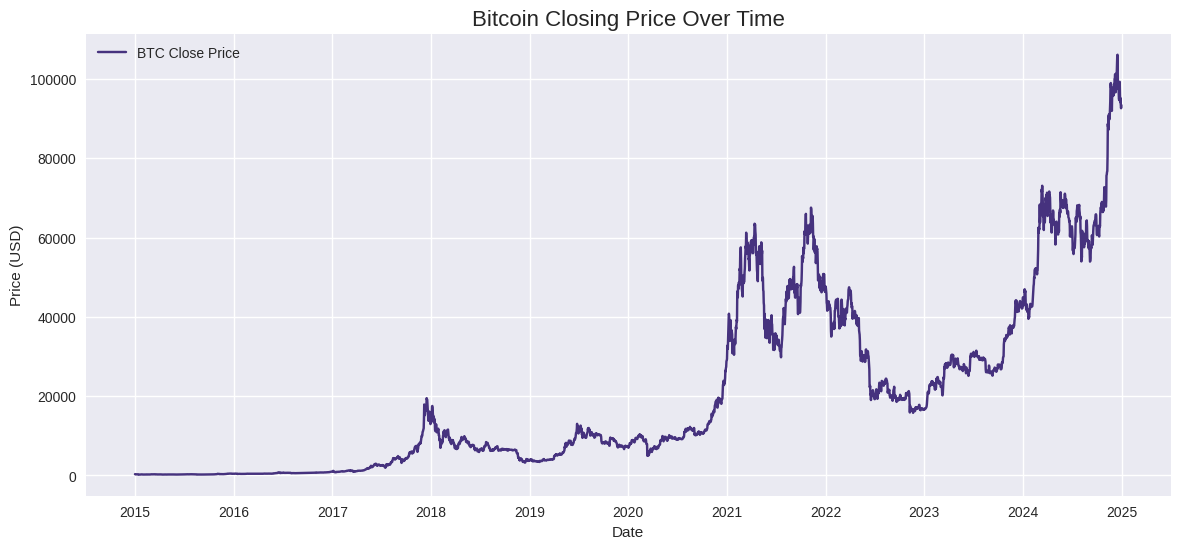

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df["Close"], label="BTC Close Price")
plt.title("Bitcoin Closing Price Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

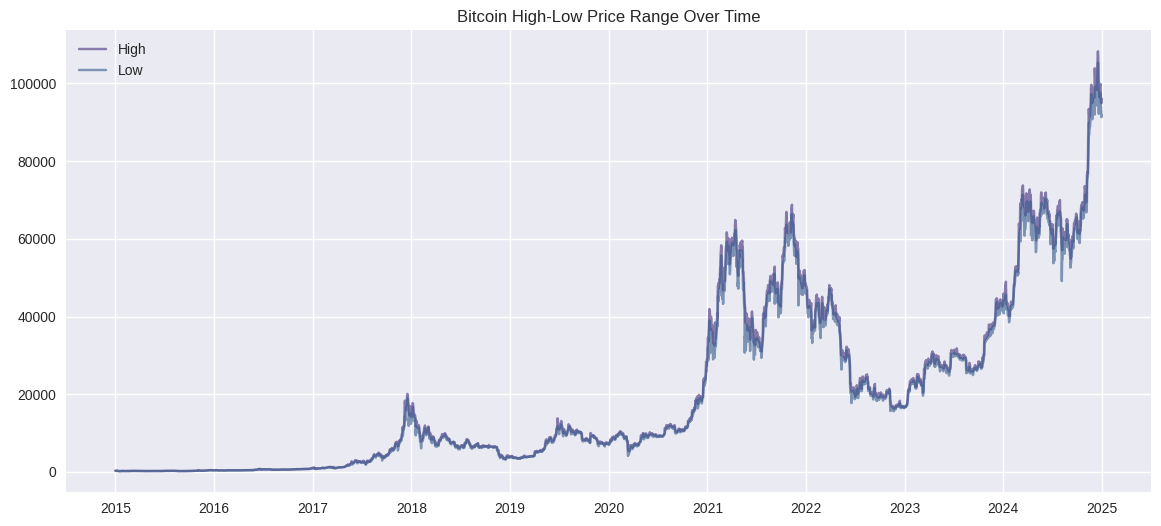

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df["High"], label="High", alpha=0.6)
plt.plot(df.index, df["Low"], label="Low", alpha=0.6)
plt.fill_between(df.index, df["Low"], df["High"], alpha=0.1)
plt.title("Bitcoin High-Low Price Range Over Time")
plt.legend()
plt.show()

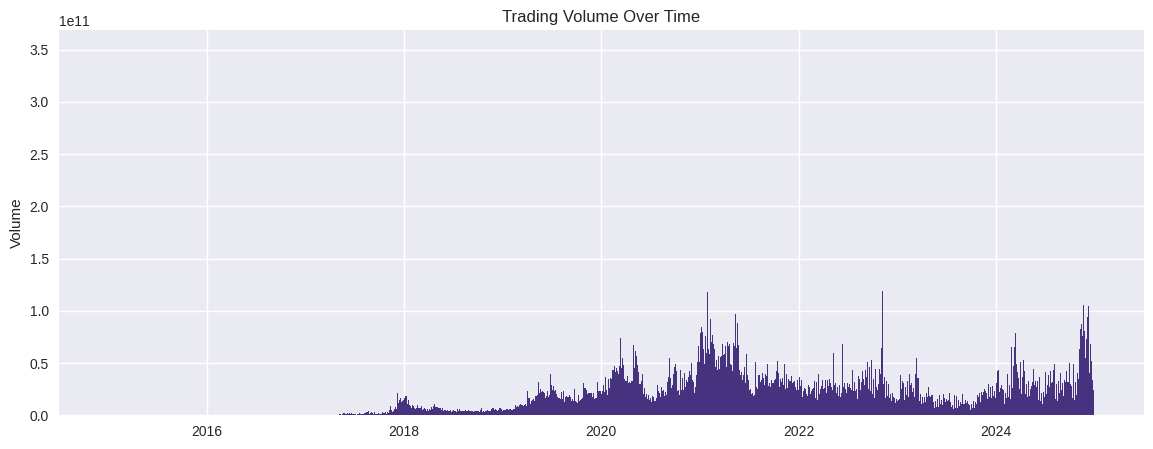

In [ ]:
plt.figure(figsize=(14,5))
plt.bar(df.index, df["Volume"], width=1.0)
plt.title("Trading Volume Over Time")
plt.ylabel("Volume")
plt.show()

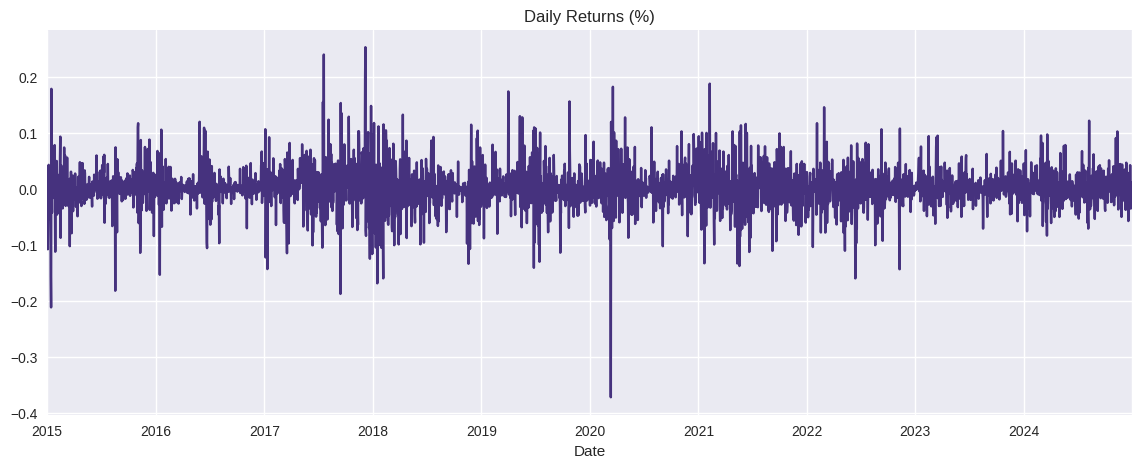

In [ ]:
df["Return"] = df["Close"].pct_change()
df["Return"].plot(figsize=(14,5), title="Daily Returns (%)")
plt.show()

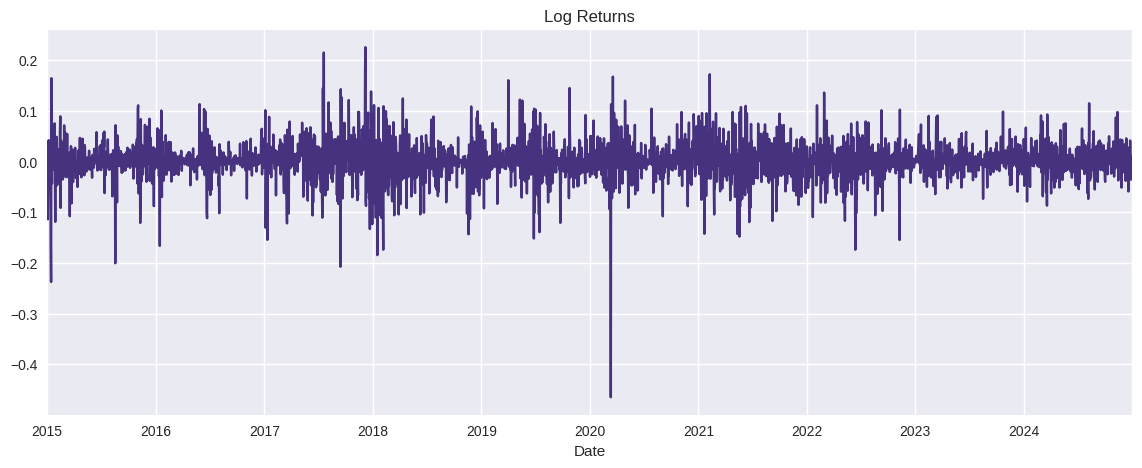

In [ ]:
df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))
df["LogReturn"].plot(figsize=(14,5), title="Log Returns")
plt.show()

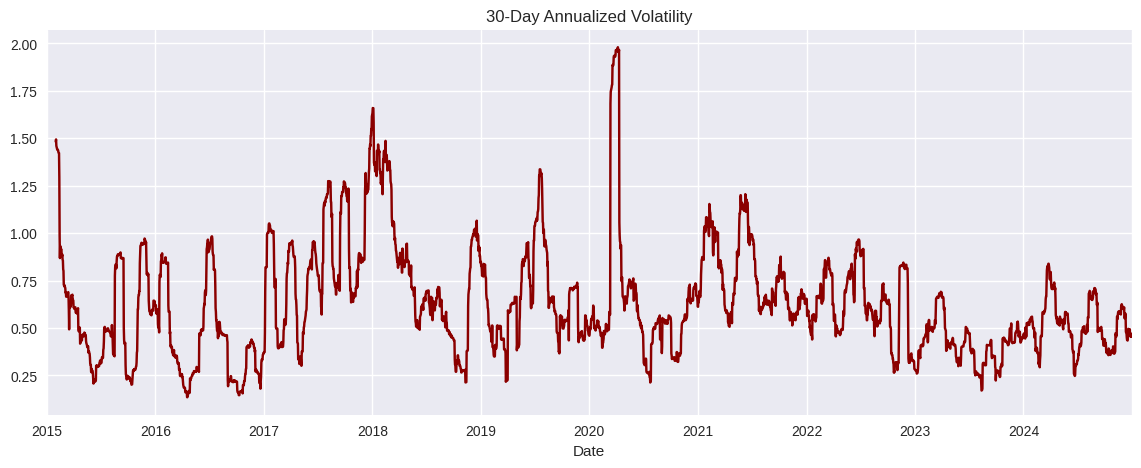

In [ ]:
df["RollingVolatility"] = df["LogReturn"].rolling(30).std() * np.sqrt(365)

df["RollingVolatility"].plot(figsize=(14,5),
                             title="30-Day Annualized Volatility",
                             color="darkred")
plt.show()

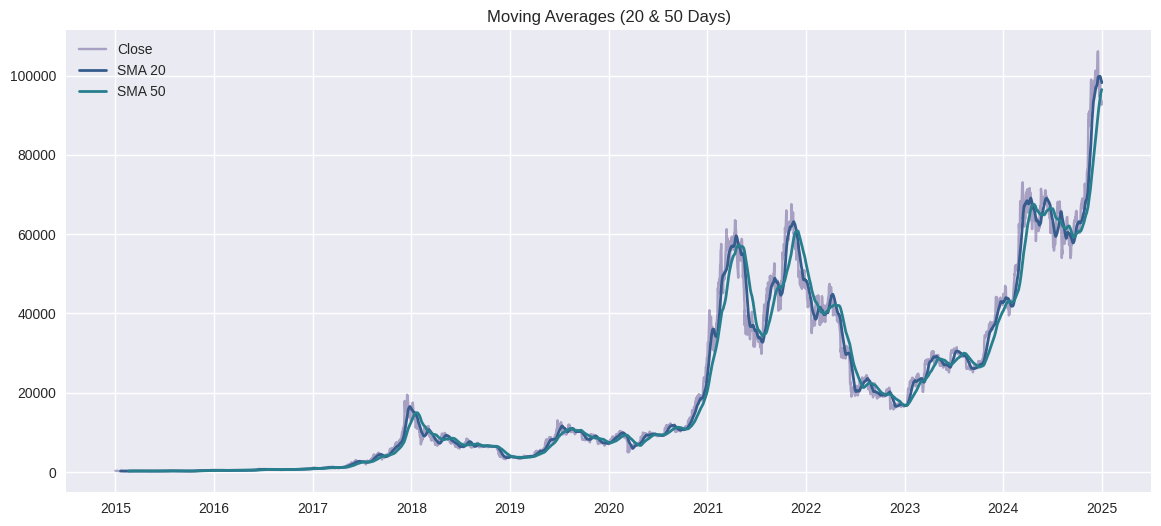

In [ ]:
df["SMA_20"] = df["Close"].rolling(20).mean()
df["SMA_50"] = df["Close"].rolling(50).mean()

plt.figure(figsize=(14,6))
plt.plot(df.index, df["Close"], label="Close", alpha=0.4)
plt.plot(df.index, df["SMA_20"], label="SMA 20", linewidth=2)
plt.plot(df.index, df["SMA_50"], label="SMA 50", linewidth=2)
plt.title("Moving Averages (20 & 50 Days)")
plt.legend()
plt.show()

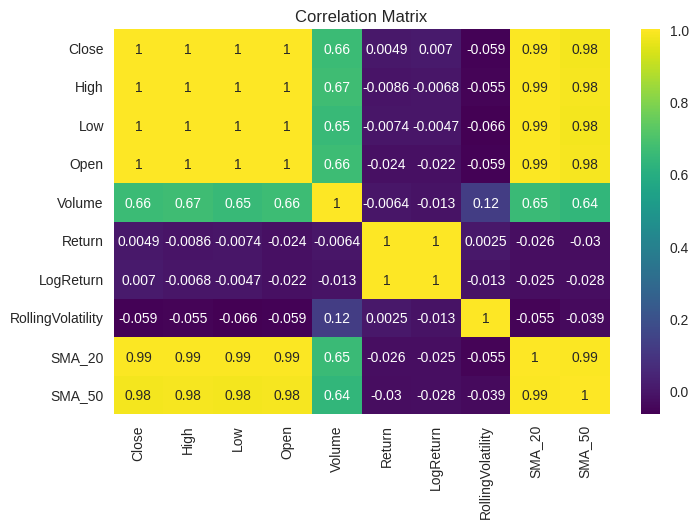

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()